# Introducing the Perceptron Model

## What is a Perceptron?

At the heart of many neural network architectures lies the Perceptron, a fundamental building block for understanding deep learning and artificial intelligence. A Perceptron is a simple yet powerful linear binary classifier used in supervised learning. It forms the basic unit of a neural network, providing the foundation for more complex algorithms and models.

## How Does a Perceptron Work?

A Perceptron makes decisions by weighing input signals, summing them up, and then passing them through an activation function to produce an output. The core components of a Perceptron include:

- **Inputs ($x$)**: These are the features or signals fed into the Perceptron.
- **Weights ($w$)**: Each input has an associated weight, representing its importance. The Perceptron learns these weights during the training process.
- **Bias ($b$)**: This is an extra input to the Perceptron with a fixed value of 1, allowing the model to shift the activation function to the left or right, which is critical for successful learning.
- **Summation Function ($𝞢$)**: This function sums the weighted inputs and the bias.
- **Activation Function**: A function that decides whether a neuron should be activated or not. The most basic form is a step function that outputs either 1 or 0.

The formula can be summarized as:

$$\text{Output} = \text{Activation Function} \left( \sum (\text{Weights} \times \text{Inputs}) + \text{Bias} \right)$$

## Perceptron Learning Rule

The Perceptron learns by adjusting its weights. The learning rule is a simple method of weight updating, based on the difference between the expected and actual output. It's typically formulated as:

$$w_{\text{new}} = w_{\text{old}} + \text{Learning Rate} \times (\text{Expected Output} - \text{Actual Output}) \times \text{Input}$$

## Implementing a Perceptron in PyTorch

In this interactive notebook, we will implement a Perceptron using PyTorch, providing a comprehensive introduction to the foundational concepts of neural networks through the lens of the perceptron model.

In this notebook, we will embark on a journey to explore the perceptron model, starting from its theoretical underpinnings and advancing towards practical implementation. Our focus will be on using PyTorch, a leading library in the field of machine learning, known for its flexibility and efficiency in building and training models.

We will begin by building a perceptron model from scratch, allowing you to grasp the nuts and bolts of neural network operations. This hands-on approach will enhance your understanding of the model's structure and its functionality.

Further, we'll dive into PyTorch's neural network (nn) module, exploring its rich functionalities and how it simplifies the process of building and training neural networks. You'll learn to create multi output perceptron and multilayer perceptron model, and thus construct neural network model's architecture using PyTorch's neural network (nn) module.

Finally, we'll solidify your learning with a small assignment. You'll get to apply your newfound knowledge by defining your own neural network model using PyTorch's nn modules.

By the end of this notebook, you will have a clear understanding of how a Perceptron operates, and you'll be equipped with practical skills to implement and train a Perceptron model using both a from-scratch approach and PyTorch's powerful neural network modules. This knowledge lays the groundwork for delving deeper into more complex neural network architectures in your future endeavors in machine learning. Let's get started!

# Perceptron Model in PyTorch from Scratch

First, we will import necessary modules.

In [195]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

We generate synthetic data for binary classification, consisting of two features (X1 and X2) and binary labels (Y).

In [183]:
# Set a random seed for reproducibility
torch.manual_seed(1010)

# Generate some synthetic data for binary classification
num_samples = 100
X = torch.rand((num_samples, 2))  # Two features
Y = (X[:, 0] + X[:, 1] > 1).float()  # Binary labels (1 if X1 + X2 > 1, else 0)

We first visualize the generated data and the true decision boundary. The green dashed line is the true boundary line.

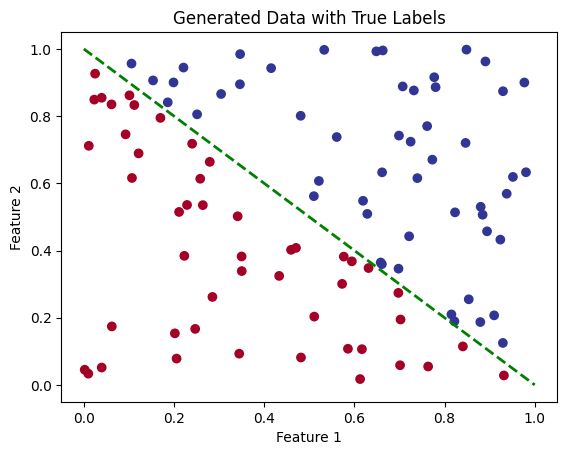

In [184]:
# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)
x_values = torch.linspace(0, 1, 100)
y_values_true = -1 * x_values + 1
plt.plot(x_values, y_values_true, 'g--', linewidth=2, label='True Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data with True Labels')
plt.show()

Then, we define a Perceptron model using PyTorch. This Perceptron model uses the step function as its activation function.

In [185]:
# Define the Perceptron model
class Perceptron(torch.nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.weights = torch.nn.Parameter(torch.rand(input_size, 1),requires_grad=True)
        self.bias = torch.nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, x):
        z = torch.matmul(x, self.weights) + self.bias
        return torch.sigmoid(z)


After definition, we will formally create this defined perceptron model with the input size specified.

In [186]:
# Create the Perceptron model
input_size = 2  # Number of input features
model = Perceptron(input_size)

Below, we will specify the Binary Cross-Entropy Loss as the loss function and Stochastic Gradient Descent (SGD) as the optimizer.

In [187]:
# Define the loss function (Binary Cross-Entropy Loss)
criterion = torch.nn.BCELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=1)

Now, we are ready to start training. In the training loop, we'll iterate through the dataset for a specified number of epochs, compute the loss, perform backpropagation, and update the model's parameters.

In [188]:
# Training loop
num_epochs = 1500
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y.unsqueeze(1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [100/1500], Loss: 0.3803
Epoch [200/1500], Loss: 0.3045
Epoch [300/1500], Loss: 0.2666
Epoch [400/1500], Loss: 0.2425
Epoch [500/1500], Loss: 0.2254
Epoch [600/1500], Loss: 0.2124
Epoch [700/1500], Loss: 0.2019
Epoch [800/1500], Loss: 0.1933
Epoch [900/1500], Loss: 0.1859
Epoch [1000/1500], Loss: 0.1796
Epoch [1100/1500], Loss: 0.1741
Epoch [1200/1500], Loss: 0.1691
Epoch [1300/1500], Loss: 0.1647
Epoch [1400/1500], Loss: 0.1607
Epoch [1500/1500], Loss: 0.1570


Then, we'll visualize the loss curve to monitor the training progress.

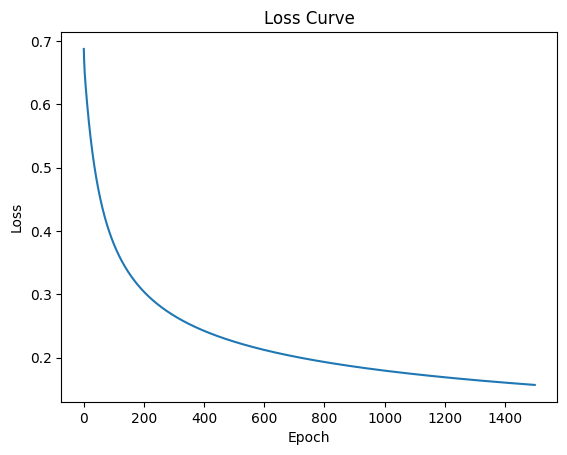

In [189]:
# Plot the loss curve
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


Also, we'll evaluate the model's accuracy on the training data to assess its performance.

In [190]:
# Evaluate the model's accuracy
with torch.no_grad():
    predicted = model(X).round()
    accuracy = (predicted == Y.unsqueeze(1)).float().mean()
    print(f'Accuracy: {accuracy.item() * 100:.2f}%')

Accuracy: 100.00%


Next, we will visualize the data points, predictions, the decision boundary and the true boundary in the same figure while comparing the predictions with the true labels.

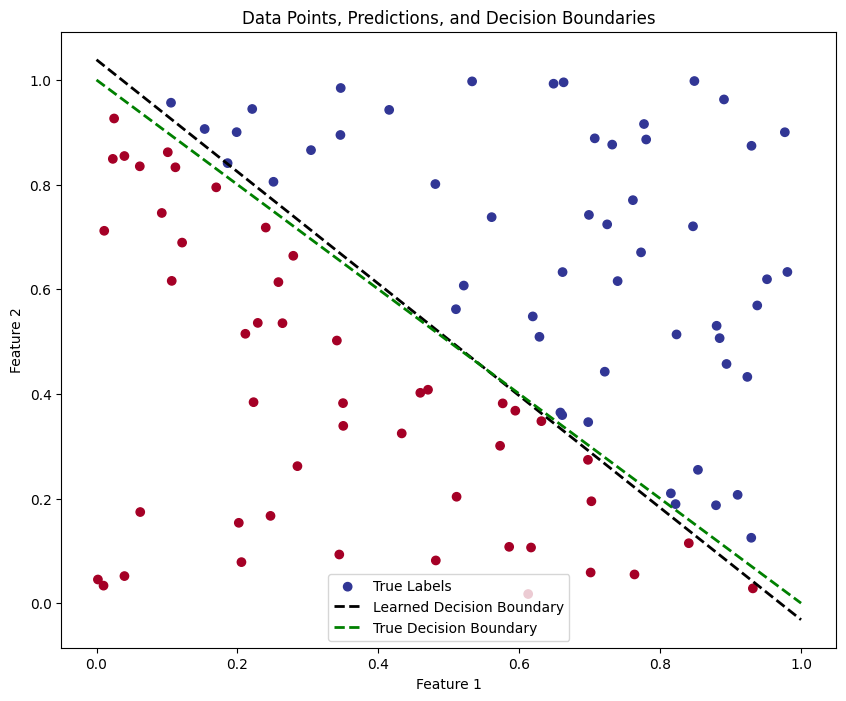

In [193]:
# Visualize the generated data, predictions, and decision boundaries
plt.figure(figsize=(10, 8))

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=Y.numpy(), cmap=plt.cm.RdYlBu, label='True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Construct the decision boundary lines
with torch.no_grad():
    predicted = model(X)
    slope = -model.weights[0] / model.weights[1]
    intercept = -model.bias / model.weights[1]
    x_values = torch.linspace(0, 1, 100)
    y_values_model = slope * x_values + intercept
    y_values_true = -1 * x_values + 1

plt.plot(x_values, y_values_model, 'k--', linewidth=2, label='Learned Decision Boundary')
plt.plot(x_values, y_values_true, 'g--', linewidth=2, label='True Decision Boundary')

plt.legend()
plt.title('Data Points, Predictions, and Decision Boundaries')
plt.show()

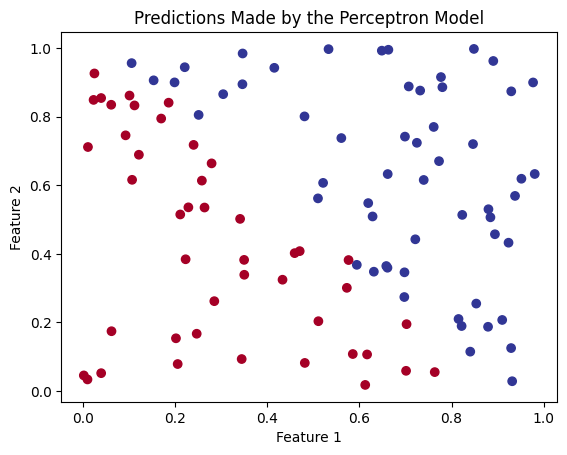

In [139]:
# Visualize the predictions made by the Perceptron model
with torch.no_grad():
    predicted = model(X).round()
    plt.scatter(X[:, 0], X[:, 1], c=predicted.numpy().squeeze(), cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Predictions Made by the Perceptron Model')
    plt.show()

# Multi-output Perceptron

A multi-output perceptron (also known as a multi-output single-layer neural network) is a neural network with a single layer that can produce multiple output values for a given input. In PyTorch, **you can create such a network using a single linear layer with multiple output units.**

Epoch [10/200], Loss: 0.2343
Epoch [20/200], Loss: 0.0972
Epoch [30/200], Loss: 0.0930
Epoch [40/200], Loss: 0.0898
Epoch [50/200], Loss: 0.0868
Epoch [60/200], Loss: 0.0839
Epoch [70/200], Loss: 0.0810
Epoch [80/200], Loss: 0.0783
Epoch [90/200], Loss: 0.0757
Epoch [100/200], Loss: 0.0731
Epoch [110/200], Loss: 0.0706
Epoch [120/200], Loss: 0.0682
Epoch [130/200], Loss: 0.0659
Epoch [140/200], Loss: 0.0637
Epoch [150/200], Loss: 0.0615
Epoch [160/200], Loss: 0.0595
Epoch [170/200], Loss: 0.0575
Epoch [180/200], Loss: 0.0555
Epoch [190/200], Loss: 0.0536
Epoch [200/200], Loss: 0.0518


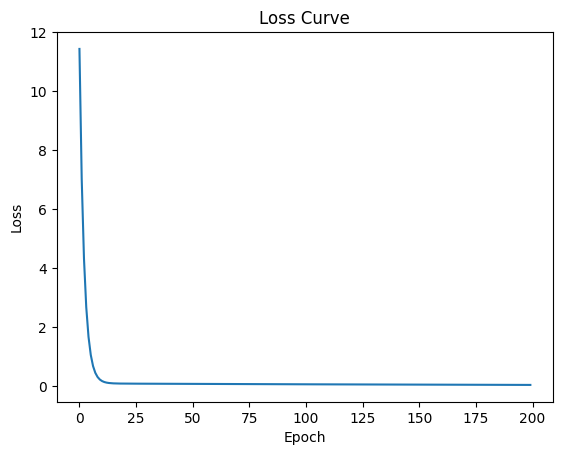

Predicted Outputs:
tensor([[2.3936, 3.3286],
        [4.1851, 5.1545],
        [5.9767, 6.9805],
        [7.7682, 8.8065]])


In [197]:
import torch.nn as nn

# Set a random seed for reproducibility
torch.manual_seed(42)

# Define the input data
X = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0]], dtype=torch.float32)

# Define the corresponding target outputs (2 output units)
Y = torch.tensor([[2.0, 3.0], [4.0, 5.0], [6.0, 7.0], [8.0, 9.0]], dtype=torch.float32)

# Define a single-layer neural network (multi-output perceptron)
class MultiOutputPerceptron(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultiOutputPerceptron, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Create the multi-output perceptron
input_size = 2  # Number of input features
output_size = 2  # Number of output units
model = MultiOutputPerceptron(input_size, output_size)

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 200
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the loss curve
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Evaluate the model's predictions
with torch.no_grad():
    predicted = model(X)
    print("Predicted Outputs:")
    print(predicted)


# Single-Layer Neural Network Architecture

In this example code, we define a PyTorch module called SingleLayerNetwork. It has one hidden layer with a specified number of nodes (4 in this case), but you can change it as needed. The network takes 3 inputs and produces 2 outputs. The forward method defines how the data flows through the network, applying a ReLU activation function after the hidden layer. The example input is a random tensor with a batch size of 1 and 3 features, representing a single data point passing through the network.

In [198]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network
class SingleLayerNetwork(nn.Module):
    def __init__(self):
        super(SingleLayerNetwork, self).__init__()
        # Define the number of nodes in each layer
        self.input_size = 3
        self.hidden_size = 4  # You can change the number of nodes in the hidden layer
        self.output_size = 2

        # Define the layers
        self.hidden = nn.Linear(self.input_size, self.hidden_size)
        self.output = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, x):
        # Pass the input through the hidden layer, then an activation function, and finally the output layer
        x = F.relu(self.hidden(x))
        x = self.output(x)
        return x

# Create the neural network
net = SingleLayerNetwork()

# Example input (batch size of 1)
example_input = torch.rand(1, 3)  # One sample with 3 features

# Get the network's output
output = net(example_input)
print(output)

tensor([[ 0.3516, -0.5166]], grad_fn=<AddmmBackward0>)


# Multilayer Perceptron (MLP)

Below is an example of how to implement a simple Multilayer Perceptron (MLP) using PyTorch. This MLP will have an input layer, two hidden layers, and an output layer:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        # First hidden layer
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        # Second hidden layer
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        # Output layer
        self.output = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        # Pass the input through the first hidden layer and apply ReLU activation function
        x = F.relu(self.hidden1(x))
        # Pass the output through the second hidden layer and apply ReLU activation function
        x = F.relu(self.hidden2(x))
        # Pass the output through the final layer
        x = self.output(x)
        return x

# Parameters for the MLP
input_size = 784  # Example for MNIST dataset (28x28 images flattened)
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # Example for 10-class classification

# Instantiate the MLP
mlp = MLP(input_size, hidden_size1, hidden_size2, output_size)

# Example tensor input (batch size of 1)
example_input = torch.rand(1, input_size)  # Random input for demonstration

# Get the MLP's prediction for the example input
prediction = mlp(example_input)
print(prediction)


Below are breakdown explanations of the codes above:

- **Class Definition (`MLP`)**:
We define a new class called `MLP` that extends `nn.Module`, which is the base class for all neural network modules in PyTorch.

- **Initialization Method (`__init__`)**:
In the initializer, we define two fully connected hidden layers (`hidden1` and `hidden2`) and an output layer (`output`). We use `nn.Linear` to define these layers, specifying the size of the input and output for each layer.
- **Forward Method (`forward`)**:
This method defines the forward pass of the MLP. We apply the ReLU activation function after each hidden layer using `F.relu`. The output of the second hidden layer is passed through the output layer without an activation function (since this example might be for a classification task, you might apply a softmax activation function outside the model definition).

- **Instantiation**:
We create an instance of the `MLP` class, specifying the input size, the sizes of the two hidden layers, and the output size.

- **Example Input**:
We create a random tensor to simulate a single data point input.

- **Prediction**:
We pass the example input through the MLP to get a prediction.

**Note:** In a real-world scenario, you would include a training loop to train the model with a dataset and a loss function to evaluate the performance.


# Assignment

## Assignment 1: Basic MLP Construction

Objective: Build a basic Multilayer Perceptron for a binary classification task.

- Input size: 10 features
- Two hidden layers: First with 64 neurons, second with 32 neurons
- Output layer: Single neuron with a sigmoid activation function for binary classification.

Data: generate synthetic data using random functions.

Include comments explaining each part of the network.


In [ ]:
## START YOUR CODE HERE!

Example Answer:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the MLP model for binary classification
class BinaryClassificationMLP(nn.Module):
    def __init__(self):
        super(BinaryClassificationMLP, self).__init__()
        # Define the first hidden layer
        self.hidden1 = nn.Linear(10, 64)
        # Define the second hidden layer
        self.hidden2 = nn.Linear(64, 32)
        # Define the output layer
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        # Forward pass through the first hidden layer with ReLU activation
        x = F.relu(self.hidden1(x))
        # Forward pass through the second hidden layer with ReLU activation
        x = F.relu(self.hidden2(x))
        # Forward pass through the output layer with sigmoid activation
        x = torch.sigmoid(self.output(x))
        return x

# Instantiate and get a prediction from the binary classification model
binary_model = BinaryClassificationMLP()
binary_input = torch.rand(1, 10)  # Example input
binary_prediction = binary_model(binary_input)


## Assignment 2: MLP for Multi-class Classification

Objective: Construct an MLP suitable for a multi-class classification problem with 100 classes.

- Input size: 784 features (such as a flattened MNIST image)
- Three hidden layers: 256, 128, and 64 neurons, respectively
- Output layer: 100 neurons with a softmax activation function.

Data: generate synthetic data using random functions.

Implement a forward pass method that includes the ReLU activation for hidden layers

In [ ]:
## START YOUR CODE HERE!

Example Answer:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the MLP model for multi-class classification
class MulticlassClassificationMLP(nn.Module):
    def __init__(self):
        super(MulticlassClassificationMLP, self).__init__()
        self.hidden1 = nn.Linear(784, 256)  # First hidden layer with 256 neurons
        self.hidden2 = nn.Linear(256, 128)  # Second hidden layer with 128 neurons
        self.hidden3 = nn.Linear(128, 64)   # Third hidden layer with 64 neurons
        self.output = nn.Linear(64, 100)    # Output layer with 100 neurons for 100-class classification

    def forward(self, x):
        x = F.relu(self.hidden1(x))  # Apply ReLU to the output of the first hidden layer
        x = F.relu(self.hidden2(x))  # Apply ReLU to the output of the second hidden layer
        x = F.relu(self.hidden3(x))  # Apply ReLU to the output of the third hidden layer
        x = self.output(x)           # No activation function here, softmax will be applied later
        return x

# Instantiate the MLP model
multiclass_classifier = MulticlassClassificationMLP()

# Example tensor input (batch size of 1, with 784 features, e.g., flattened 28x28 image)
example_input = torch.rand(1, 784)  # Random input for demonstration

# Get the prediction from the model
prediction = multiclass_classifier(example_input)
# Apply softmax to get probabilities for each class
probabilities = F.softmax(prediction, dim=1)
print(probabilities)
